In [55]:
import numpy as np
import matplotlib.pyplot as plt 
from performance_simulation import *

In [56]:
#General parameters
years = 5
time = 261 * years


#Import parameters
n = int(261 * np.random.uniform(0, 15))
path = "data/MSCI_World.csv"
limit = slice(n, time+n)


#Trade parameters
trades = 10 * years
max_trades = 20 * years
hold_time = 20
time_after_reversel = 0
smooth_period = 20

trade_coast = 1
spread = 0.002
tax_rate = 0.025
tax_allowance = 1000

initial_capital = 5000
saving_plan = 100
saving_plan_time = 22


chim =  ChartImport(  initial_capital=initial_capital, saving_plan=saving_plan, saving_plan_time=saving_plan_time, time=time, 
                      trades=trades, max_trades=max_trades, hold_time=hold_time, time_after_reversel=time_after_reversel, smooth_period=smooth_period, trade_coast=trade_coast, spread=spread, tax_rate=tax_rate, tax_allowance=tax_allowance
                      )

performance, dates = chim.load_data(path=path, limit=limit)

buy_and_hold_performance = chim.buy_and_hold(set='data')
random_swing_performance_analyse, trade_dates_random  = chim.random_swing_trade_ana(set='data')
swing_performance_analyse, trade_dates = chim.swing_trade_ana(set='data')


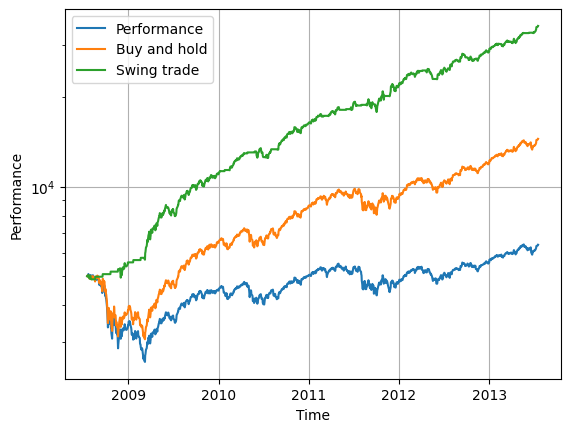

Total money invested:  10931
Index performance: Absolute: 6378.99, Relative: 0.58
Buy and hold return: Absolute: 14502.88, Relative: 1.33
Swing trade return: Absolute: 34808.09, Relative: 3.18
Random swing trade return: Absolute: 10458.29, Relative: 0.96


In [57]:
plt.plot(dates, performance, label="Performance")
plt.plot(dates, buy_and_hold_performance, label="Buy and hold")
plt.plot(dates, swing_performance_analyse, label="Swing trade")
#plt.plot(dates, random_swing_performance_analyse, label="Random swing trade")
#plt.axhline(1, color="black", linestyle="--")   

plt.xlabel("Time")
plt.ylabel("Performance")

plt.grid()
plt.legend()

plt.yscale("log")

plt.show()

#chim.print_parameters()
chim.print_results()
#chim.plot_performance()

In [4]:
mc = MonteCarloSimulation(chartimp=chim, parallel=True)
_ = mc.mc_import_chart(n=2500, stepsize=2, path=path, limit=limit)

  0%|          | 0/2500 [00:00<?, ?it/s]

100%|██████████| 2500/2500 [01:31<00:00, 27.33it/s]


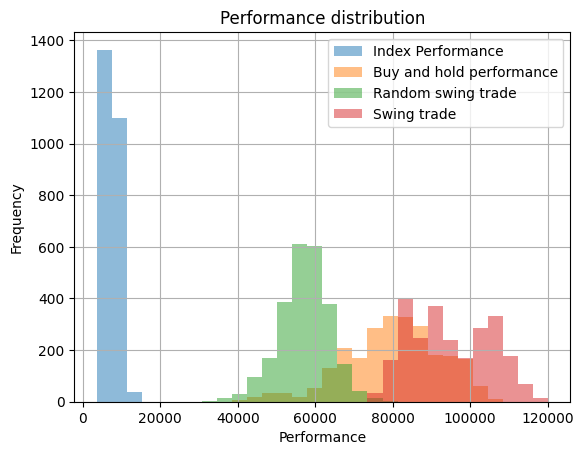

Index performance:
  Overall return: 7290.916 +/- 1986.743 (Median: 7227.992)
  Yearly return: 5.887 +/- 0.326 (Median: 5.913) 

Buy and hold return:
  Overall return: 80307.505 +/- 12279.332 (Median: 80989.903)
  Yearly return: 9.552 +/- 0.308 (Median: 9.587) 

Random swing trade return analyse:
  Overall return: 57351.464 +/- 6488.664 (Median: 57591.325)
  Yearly return: 8.938 +/- 0.209 (Median: 8.955) 

Swing trade return analyse:
  Overall return: 94798.903 +/- 10294.184 (Median: 93228.833)
  Yearly return: 9.884 +/- 0.215 (Median: 9.861) 



In [5]:
mc.hist_performance(bins=30)
mc.print_results(accuracy=3)

In [6]:
mc.chartsim